In [ ]:
#Portfolio Projet 2 - Automating Crypto Website API Pull Using Python 

# Muhammad Amif - 03/06/2023

In [236]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [237]:
type(data)

dict

In [238]:
import pandas as pd


#This allows to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [239]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\AMIF\AppData\Local\Temp\ipykernel_46444\4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10241,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19391631.00000,19391631.00000,False,NaN,1,NaN,NaN,None,2023-06-03T09:11:00.000Z,27153.34058,11612503186.88974,-20.39000,-0.11366,0.01545,1.70461,-6.70830,-3.48283,21.44063,526547560951.21039,45.91600,570220152187.06995,None,2023-06-03T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 09:12:59.442153
1,1027,Ethereum,ETH,ethereum,6965,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120236711.59771,120236711.59771,True,NaN,2,NaN,NaN,None,2023-06-03T09:11:00.000Z,1902.64855,4874113184.11651,-13.52450,-0.06398,0.50640,4.02206,0.02421,4.15210,21.42507,228768204995.62515,19.94910,228768204995.63000,None,2023-06-03T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 09:12:59.442153
2,825,Tether,USDT,tether,54992,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83152494318.89395,86090638895.02290,True,NaN,3,NaN,NaN,None,2023-06-03T09:11:00.000Z,1.00028,17175897543.82687,-15.19730,0.00942,0.01322,-0.00370,-0.00234,0.02444,0.01367,83176011715.76999,7.25310,86114987265.31000,None,2023-06-03T09:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-03 09:12:59.442153
3,1839,BNB,BNB,bnb,1443,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155856125.28925,155856125.28925,False,NaN,4,NaN,NaN,None,2023-06-03T09:11:00.000Z,305.87612,317900331.68890,-11.24330,-0.09861,-0.65828,0.07269,-6.23645,-1.52775,5.31770,47672666939.96133,4.15680,47672666939.96000,None,2023-06-03T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 09:12:59.442153
4,3408,USD Coin,USDC,usd-coin,12799,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28910574459.46301,28910574459.46301,False,NaN,5,NaN,NaN,None,2023-06-03T09:11:00.000Z,1.00001,2434871770.27417,-12.21010,0.00319,0.01044,-0.00760,0.00415,0.03157,0.00023,28910789782.75294,2.52110,28910789782.75000,None,2023-06-03T09:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-03 09:12:59.442153
5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,None,2023-06-03T09:11:00.000Z,0.52344,918555784.05446,-8.07590,-0.18792,1.64595,10.92389,13.44097,5.37750,40.50903,27211968907.46927,2.37300,52343777692.69000,None,2023-06-03T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 09:12:59.442153
6,2010,Cardano,ADA,cardano,817,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34889417694.32600,35842779602.84000,False,NaN,7,NaN,NaN,None,2023-06-03T09:11:00.000Z,0.37603,165960685.34671,-21.52250,-0.20059,0.67516,3.44603,-4.18233,-4.12150,11.15604,13119469702.64664,1.14400,16921352537.08000,None,2023-06-03T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 09:12:59.442153
7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139611166383.70526,139611166383.70526,True,NaN,8,NaN,NaN,None,2023-06-03T09:11:00.000Z,0.07250,153063356.55674,-0.15690,-0.01387,0.31133,1.52474,-8.49151,-26.36373,-3.67264,10121513970.75369,0.88250,10121513970.75000,None,2023-06-03T09:11:00.000Z,NaN,

In [ ]:
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df = df.append(df)

    
    if not os.path.isfile(r'C:\Users\AMIF\OneDrive\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\AMIF\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\AMIF\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        

In [241]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\AMIF\AppData\Local\Temp\ipykernel_46444\540144245.py:29: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')
C:\Users\AMIF\AppData\Local\Temp\ipykernel_46444\540144245.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df)


API Runner completed


KeyboardInterrupt: 

In [242]:
df72 = pd.read_csv(r'C:\Users\AMIF\OneDrive\Documents\Python Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10241,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19391556.00000,19391556.00000,False,NaN,1,NaN,NaN,NaN,2023-06-03T07:41:00.000Z,27193.94949,11965704158.46326,-17.93790,-0.03589,0.34746,1.73410,-6.50199,-2.89878,21.37596,527332994332.45032,45.94670,571072939220.63000,NaN,2023-06-03T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 07:43:11.592582
1,1,1027,Ethereum,ETH,ethereum,6965,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120236711.59771,120236711.59771,True,NaN,2,NaN,NaN,NaN,2023-06-03T07:41:00.000Z,1905.34360,5052738359.85295,-9.32730,0.02417,0.92255,4.04193,0.30017,4.99750,21.35995,229092248886.01321,19.95920,229092248886.01001,NaN,2023-06-03T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 07:43:11.592582
2,2,825,Tether,USDT,tether,54990,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83152494318.89395,86090638895.02290,True,NaN,3,NaN,NaN,NaN,2023-06-03T07:41:00.000Z,1.00018,17731207828.79021,-12.36360,-0.01464,0.00966,-0.00817,-0.01434,-0.01199,0.00364,83167329220.27161,7.24580,86105997978.92999,NaN,2023-06-03T07:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-03 07:43:11.592582
3,3,1839,BNB,BNB,bnb,1443,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155856137.85853,155856137.85853,False,NaN,4,NaN,NaN,NaN,2023-06-03T07:41:00.000Z,306.45008,329498752.54830,-8.11980,-0.05636,-0.36024,-0.04224,-6.03821,-1.23726,5.49118,47762125463.38126,4.16080,47762125463.38000,NaN,2023-06-03T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 07:43:11.592582
4,4,3408,USD Coin,USDC,usd-coin,12799,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28911140164.81301,28911140164.81301,False,NaN,5,NaN,NaN,NaN,2023-06-03T07:41:00.000Z,0.99990,2548354145.16589,-8.47040,-0.01401,-0.00455,-0.00232,-0.01083,-0.00207,-0.00700,28908114422.69048,2.51840,28908114422.69000,NaN,2023-06-03T07:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-03 07:43:11.592582
5,5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,NaN,2023-06-03T07:41:00.000Z,0.52516,935651127.36334,-6.89330,-0.18974,1.82369,10.94863,13.63801,5.18050,40.59424,27301742812.69684,2.37850,52516462931.08000,NaN,2023-06-03T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 07:43:11.592582
6,6,2010,Cardano,ADA,cardano,816,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34889019783.12100,35842779602.84000,False,NaN,7,NaN,NaN,NaN,2023-06-03T07:41:00.000Z,0.37726,168703428.99094,-23.02480,-0.10007,1.36908,3.61082,-4.21912,-3.40154,11.11117,13162063062.75003,1.14680,16976482615.61000,NaN,2023-06-03T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 07:43:11.592582
7,7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139610026383.70526,139610026383.70526,True,NaN,8,NaN,NaN,NaN,2023-06-03T07:41:00.000Z,0.07251,154139413.38355,0.21620,-0.05916,0.59482,1.43077,-8.58865,-26.37596,-3.78941,10123050931.59464,0.88190,10123050931.59000,NaN,2023-06-03T07:4

In [243]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [244]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10241,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19391631.00000,19391631.00000,False,NaN,1,NaN,NaN,None,2023-06-03T09:11:00.000Z,27153.34058,11612503186.88974,-20.39000,-0.11366,0.01545,1.70461,-6.70830,-3.48283,21.44063,526547560951.21039,45.91600,570220152187.06995,None,2023-06-03T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 09:13:06.386894
1,1027,Ethereum,ETH,ethereum,6965,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120236711.59771,120236711.59771,True,NaN,2,NaN,NaN,None,2023-06-03T09:11:00.000Z,1902.64855,4874113184.11651,-13.52450,-0.06398,0.50640,4.02206,0.02421,4.15210,21.42507,228768204995.62515,19.94910,228768204995.63000,None,2023-06-03T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 09:13:06.386894
2,825,Tether,USDT,tether,54992,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83152494318.89395,86090638895.02290,True,NaN,3,NaN,NaN,None,2023-06-03T09:11:00.000Z,1.00028,17175897543.82687,-15.19730,0.00942,0.01322,-0.00370,-0.00234,0.02444,0.01367,83176011715.76999,7.25310,86114987265.31000,None,2023-06-03T09:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-03 09:13:06.386894
3,1839,BNB,BNB,bnb,1443,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155856125.28925,155856125.28925,False,NaN,4,NaN,NaN,None,2023-06-03T09:11:00.000Z,305.87612,317900331.68890,-11.24330,-0.09861,-0.65828,0.07269,-6.23645,-1.52775,5.31770,47672666939.96133,4.15680,47672666939.96000,None,2023-06-03T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 09:13:06.386894
4,3408,USD Coin,USDC,usd-coin,12799,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28910574459.46301,28910574459.46301,False,NaN,5,NaN,NaN,None,2023-06-03T09:11:00.000Z,1.00001,2434871770.27417,-12.21010,0.00319,0.01044,-0.00760,0.00415,0.03157,0.00023,28910789782.75294,2.52110,28910789782.75000,None,2023-06-03T09:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-03 09:13:06.386894
5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,None,2023-06-03T09:11:00.000Z,0.52344,918555784.05446,-8.07590,-0.18792,1.64595,10.92389,13.44097,5.37750,40.50903,27211968907.46927,2.37300,52343777692.69000,None,2023-06-03T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 09:13:06.386894
6,2010,Cardano,ADA,cardano,817,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34889417694.32600,35842779602.84000,False,NaN,7,NaN,NaN,None,2023-06-03T09:11:00.000Z,0.37603,165960685.34671,-21.52250,-0.20059,0.67516,3.44603,-4.18233,-4.12150,11.15604,13119469702.64664,1.14400,16921352537.08000,None,2023-06-03T09:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 09:13:06.386894
7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139611166383.70526,139611166383.70526,True,NaN,8,NaN,NaN,None,2023-06-03T09:11:00.000Z,0.07250,153063356.55674,-0.15690,-0.01387,0.31133,1.52474,-8.49151,-26.36373,-3.67264,10121513970.75369,0.88250,10121513970.75000,None,2023-06-03T09:11:00.000Z,NaN,

In [245]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.11366,0.01545,1.70461,-6.70830,-3.48283,21.44063
Ethereum,-0.06398,0.50640,4.02206,0.02421,4.15210,21.42507
Tether,0.00942,0.01322,-0.00370,-0.00234,0.02444,0.01367
BNB,-0.09861,-0.65828,0.07269,-6.23645,-1.52775,5.31770
USD Coin,0.00319,0.01044,-0.00760,0.00415,0.03157,0.00023
XRP,-0.18792,1.64595,10.92389,13.44097,5.37750,40.50903
Cardano,-0.20059,0.67516,3.44603,-4.18233,-4.12150,11.15604
Dogecoin,-0.01387,0.31133,1.52474,-8.49151,-26.36373,-3.67264
Solana,-0.31224,-0.54161,8.31730,-4.88056,2.29255,-0.53147


In [246]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.11366
             quote.USD.percent_change_24h     0.01545
             quote.USD.percent_change_7d      1.70461
             quote.USD.percent_change_30d    -6.70830
             quote.USD.percent_change_60d    -3.48283
             quote.USD.percent_change_90d    21.44063
Ethereum     quote.USD.percent_change_1h     -0.06398
             quote.USD.percent_change_24h     0.50640
             quote.USD.percent_change_7d      4.02206
             quote.USD.percent_change_30d     0.02421
             quote.USD.percent_change_60d     4.15210
             quote.USD.percent_change_90d    21.42507
Tether       quote.USD.percent_change_1h      0.00942
             quote.USD.percent_change_24h     0.01322
             quote.USD.percent_change_7d     -0.00370
             quote.USD.percent_change_30d    -0.00234
             quote.USD.percent_change_60d     0.02444
             quote.USD.percent_change_90

In [247]:
type(df4)

pandas.core.series.Series

In [248]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.11366
            quote.USD.percent_change_24h   0.01545
            quote.USD.percent_change_7d    1.70461
            quote.USD.percent_change_30d  -6.70830
            quote.USD.percent_change_60d  -3.48283
            quote.USD.percent_change_90d  21.44063
Ethereum    quote.USD.percent_change_1h   -0.06398
            quote.USD.percent_change_24h   0.50640
            quote.USD.percent_change_7d    4.02206
            quote.USD.percent_change_30d   0.02421
            quote.USD.percent_change_60d   4.15210
            quote.USD.percent_change_90d  21.42507
Tether      quote.USD.percent_change_1h    0.00942
            quote.USD.percent_change_24h   0.01322
            quote.USD.percent_change_7d   -0.00370
            quote.USD.percent_change_30d  -0.00234
            quote.USD.percent_change_60d   0.02444
            quote.USD.percent_change_90d   0.01367
BNB         quote.USD.percent_change_1h   -0.09861
            quote.USD.percent_change_24h  -0.65828
            quote.USD.percent_change_7d    0.07269
            quote.USD.percent_change_30d  -6.23645
            quote.USD.percent_change_60d  -1.52775
            quote.USD.percent_change_90d   5.31770
USD Coin    quote.USD.percent_change_1h    0.00319
            quote.USD.percent_change_24h   0.01044
            quote.USD.percent_change_7d   -0.00760
            quote.USD.percent_change_30d   0.00415
            quote.USD.percent_change_60d   0.03157
            quote.USD.percent_change_90d   0.00023
XRP         quote.USD.percent_change_1h   -0.18792
            quote.USD.percent_change_24h   1.64595
            quote.USD.percent_change_7d   10.92389
            quote.USD.percent_change_30d  13.44097
            quote.USD.percent_change_60d   5.37750
            quote.USD.percent_change_90d  40.50903
Cardano     quote.USD.percent_change_1h   -0.20059
            quote.USD.percent_change_24h   0.67516
            quote.USD.percent_change_7d    3.44603
            quote.USD.percent_change_30d  -4.18233
            quote.USD.percent_change_60d  -4.12150
            quote.USD.percent_change_90d  11.15604
Dogecoin    quote.USD.percent_change_1h   -0.01387
            quote.USD.percent_change_24h   0.31133
            quote.USD.percent_change_7d    1.52474
            quote.USD.percent_change_30d  -8.49151
            quote.USD.percent_change_60d -26.36373
            quote.USD.percent_change_90d  -3.67264
Solana      quote.USD.percent_change_1h   -0.31224
            quote.USD.percent_change_24h  -0.54161
            quote.USD.percent_change_7d    8.31730
            quote.USD.percent_change_30d  -4.88056
            quote.USD.percent_change_60d   2.29255
            quote.USD.percent_change_90d  -0.53147
Polygon     quote.USD.percent_change_1h    0.11622
            quote.USD.percent_change_24h  -0.68858
            quote.USD.percent_change_7d   -1.78765
            quote.USD.percent_change_30d  -9.74521
            quote.USD.percent_change_60d -18.76361
            quote.USD.percent_change_90d -20.19059
TRON        quote.USD.percent_change_1h    0.54604
            quote.USD.percent_change_24h  10.97936
            quote.USD.percent_change_7d   11.17873
            quote.USD.percent_change_30d  22.32222
            quote.USD.percent_change_60d  27.44496
            quote.USD.percent_change_90d  26.23237
Litecoin    quote.USD.percent_change_1h    0.13740
            quote.USD.percent_change_24h   0.20601
            quote.USD.percent_change_7d    8.06969
            quote.USD.percent_change_30d   7.59443
            quote.USD.percent_change_60d   2.59419
            quote.USD.percent_change_90d   4.91771
Polkadot    quote.USD.percent_change_1h   -0.07228
            quote.USD.percent_change_24h   0.10373
            quote.USD.percent_change_7d    0.38905
            quote.USD.percent_change_30d  -8.12067
            quote.USD.percent_change_60d -18.22158
            quo

In [249]:
df5.count()


values    90
dtype: int64

In [250]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.11366
1,Bitcoin,quote.USD.percent_change_24h,0.01545
2,Bitcoin,quote.USD.percent_change_7d,1.70461
3,Bitcoin,quote.USD.percent_change_30d,-6.70830
4,Bitcoin,quote.USD.percent_change_60d,-3.48283
5,Bitcoin,quote.USD.percent_change_90d,21.44063
6,Ethereum,quote.USD.percent_change_1h,-0.06398
7,Ethereum,quote.USD.percent_change_24h,0.50640
8,Ethereum,quote.USD.percent_change_7d,4.02206
9,Ethereum,quote.USD.percent_change_30d,0.02421


In [251]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.11366
1,Bitcoin,quote.USD.percent_change_24h,0.01545
2,Bitcoin,quote.USD.percent_change_7d,1.70461
3,Bitcoin,quote.USD.percent_change_30d,-6.70830
4,Bitcoin,quote.USD.percent_change_60d,-3.48283
5,Bitcoin,quote.USD.percent_change_90d,21.44063
6,Ethereum,quote.USD.percent_change_1h,-0.06398
7,Ethereum,quote.USD.percent_change_24h,0.50640
8,Ethereum,quote.USD.percent_change_7d,4.02206
9,Ethereum,quote.USD.percent_change_30d,0.02421


In [252]:
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.11366
1,Bitcoin,24h,0.01545
2,Bitcoin,7d,1.70461
3,Bitcoin,30d,-6.70830
4,Bitcoin,60d,-3.48283
5,Bitcoin,90d,21.44063
6,Ethereum,1h,-0.06398
7,Ethereum,24h,0.50640
8,Ethereum,7d,4.02206
9,Ethereum,30d,0.02421


In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

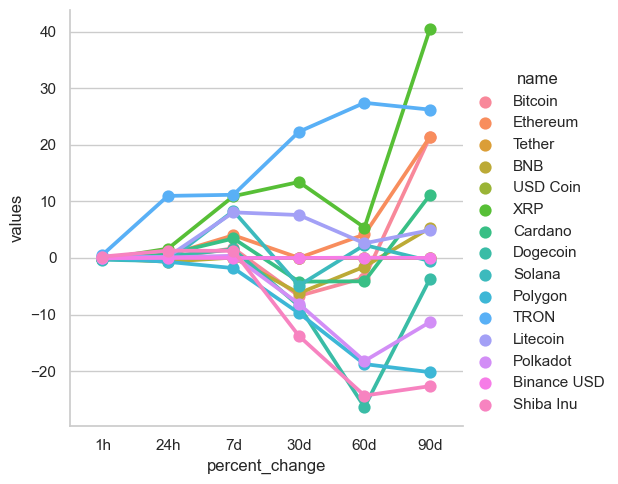

In [276]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [283]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,27153.34058,2023-06-03 09:13:06.386894
0,Bitcoin,27153.34058,2023-06-03 09:13:06.386894


In [280]:
sns.set_theme(style="whitegrid")

<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

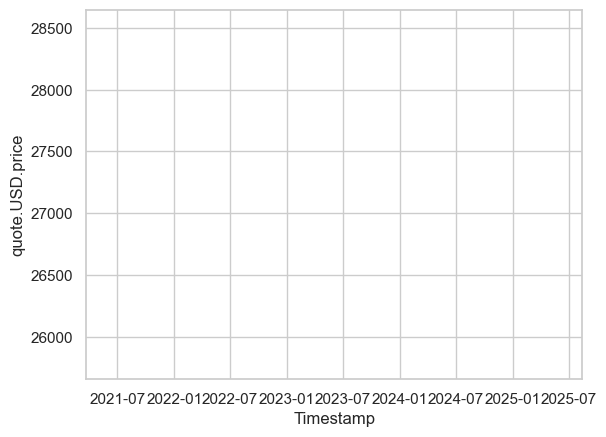

In [281]:
sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)

In [274]:
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,27153.34058,2023-06-03 09:13:06.386894
0,Bitcoin,27153.34058,2023-06-03 09:13:06.386894


In [ ]:
ini salah gegara data df10 nya beda, di video row nya banyak, di lu cuma 2 